<a href="https://colab.research.google.com/github/Dhanusha583/Deep_learning/blob/main/DL_ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow.gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [5]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
#Feature engineering
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [18]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [21]:
geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [22]:
#Concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [24]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [28]:
X=pd.concat([X,geography,gender],axis=1)

In [29]:
X=X.astype(int)

In [30]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


In [56]:
y=y.astype(int)

In [57]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

For which all algo feature scaling is required?



In [58]:
#Feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


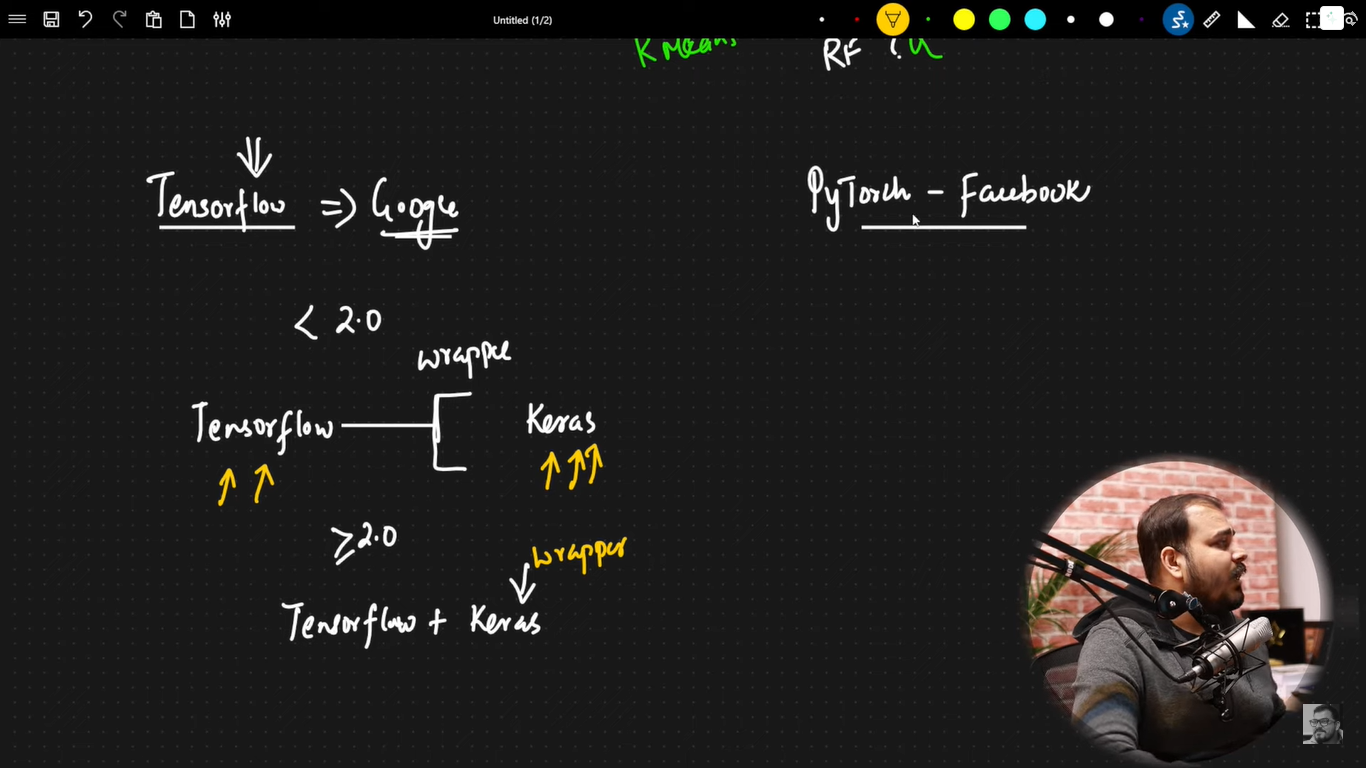

In [36]:
# #part 2 create ANN
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LeakyReLu,PReLU,ELU,ReLU
# from tensorflow.keras.layers import Dropout

### **Sequential Layer**  
- **Purpose**: Defines a linear stack of layers in a neural network, where the output of one layer becomes the input for the next.  
- **Use**: Simplifies model building by stacking layers in order.  

---

### **Dense Layer**  
- **Definition**: A fully connected layer where every neuron is connected to every neuron in the previous layer.  
- **Purpose**:  
  - Extracts patterns and features from input data.  
  - Applies weights, biases, and an activation function to transform the input.  
- **Example**: Commonly used in classification tasks to output probabilities.

---

### **Dropout Layer**  
- **Definition**: Temporarily "drops" a fraction of neurons during training by setting their output to zero.  
- **Purpose**:  
  - Prevents overfitting by forcing the network to learn more robust features.  
  - Introduces randomness to improve generalization.  
- **Example**: Often placed after dense layers in training.

---

### **How They Work Together**
1. **Dense layers** learn features and relationships.  
2. **Dropout layers** ensure these features generalize well by preventing reliance on specific neurons.  



In [59]:
###Lets initialize the ANN
classifier=Sequential()

In [60]:
X_train.shape

(8000, 11)

In [61]:
#Adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [62]:
#Adding First hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [63]:
#Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [64]:
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [65]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7170 - loss: 0.5505 - val_accuracy: 0.7963 - val_loss: 0.4497
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8163 - loss: 0.4195 - val_accuracy: 0.8152 - val_loss: 0.4253
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8300 - loss: 0.4015 - val_accuracy: 0.8273 - val_loss: 0.4025
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8422 - loss: 0.3860 - val_accuracy: 0.8345 - val_loss: 0.3842
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8535 - loss: 0.3639 - val_accuracy: 0.8421 - val_loss: 0.3757
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8494 - loss: 0.3625 - val_accuracy: 0.8470 - val_loss: 0.3714
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8607 - loss: 0.3431 - val_accuracy: 0.8482 - val_loss: 0.3680
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8607 - loss: 0.3442 - 

KeyboardInterrupt: 

### **Validation Split**  
- **Purpose**: Splits a fraction of the training data to evaluate the model during training without using it for learning.  
- **Usage**: Specified as a fraction (e.g., `0.2` for 20%) in the `fit()` method.  
- **Key Point**: Done internally, no separate dataset preparation is required.  

---

### **Difference from Train-Test Split**  
| **Aspect**           | **Validation Split**                | **Train-Test Split**             |
|-----------------------|-------------------------------------|----------------------------------|
| **Purpose**           | Monitors performance during training. | Evaluates final model accuracy. |
| **Timing**            | Used **during training**.           | Used **after training**.        |
| **Implementation**    | Handled inside `fit()`.             | Split manually before training. |

In short: `validation_split` is temporary, for monitoring during training, while `train-test split` is for final evaluation on unseen data.

https://keras.io/api/callbacks/early_stopping/

In [67]:
#Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [68]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8665 - loss: 0.3298 - val_accuracy: 0.8466 - val_loss: 0.3671
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8617 - loss: 0.3360 - val_accuracy: 0.8440 - val_loss: 0.3721
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8679 - loss: 0.3180 - val_accuracy: 0.8463 - val_loss: 0.3664
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8539 - loss: 0.3460 - val_accuracy: 0.8501 - val_loss: 0.3657
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8617 - loss: 0.3314 - val_accuracy: 0.8451 - val_loss: 0.3653
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8568 - loss: 0.3301 - val_accuracy: 0.8444 - val_loss: 0.3687
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8707 - loss: 0.3143 - val_accuracy: 0.8485 - val_loss: 0.3639
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.3263 - 

In [69]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

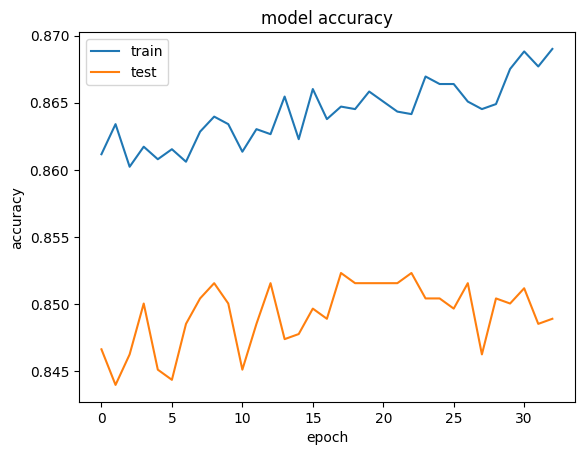

In [70]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

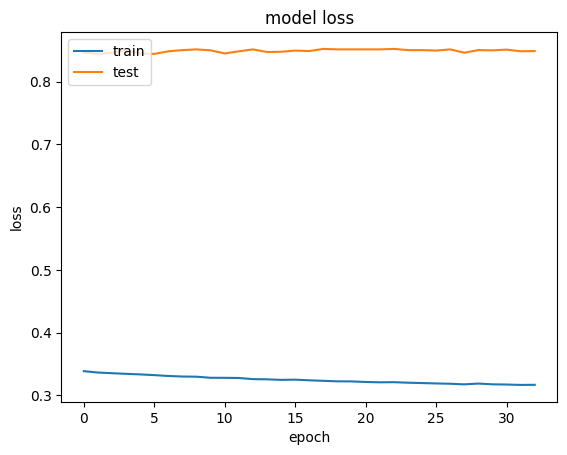

In [71]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [72]:
#Part 3-making the predictions and evaluating the model
#Predicting the Test set result
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [73]:
##Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1516,   79],
       [ 206,  199]])

In [74]:
##Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8575

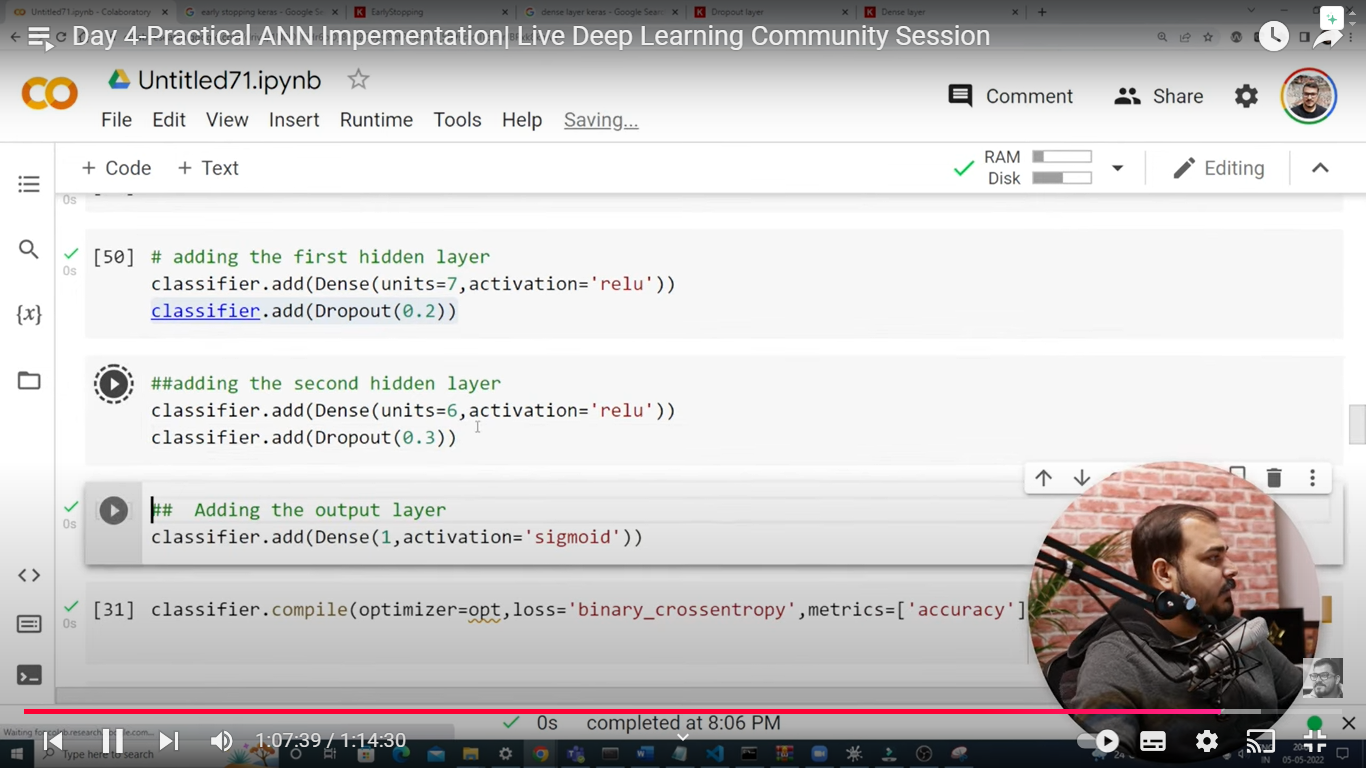

In [76]:
import pickle
# Assume `model` is your trained Keras model
weights = classifier.get_weights()

# Save weights to a pickle file
with open('Classifier.pkl', 'wb') as f:
    pickle.dump(weights, f)

print("Weights saved to model_weights.pkl")

Weights saved to model_weights.pkl


This image explains the difference between **Black Box Models** and **White Box Models** in the context of **Explainable AI (XAI)** and how these are discussed during interviews.

### **Key Points:**
1. **Black Box Models:**
   - These models are complex, and their internal workings are not easily interpretable.
   - Examples:
     - **Random Forest:** Though it is built using multiple Decision Trees, the ensemble approach (combining 100 Decision Trees) makes it challenging to interpret.
     - **Artificial Neural Networks (ANN), CNN, RNN:** Due to their deep and non-linear architectures, understanding how these models make predictions is very difficult.
     - **XGBoost:** A powerful boosting algorithm that creates multiple decision trees but operates in a way that is hard to interpret.

2. **White Box Models:**
   - These models are simpler and easier to understand.
   - Examples:
     - **Decision Trees:** They can be visualized as a flowchart, making the logic behind predictions clear.
     - **Linear Regression:** A straightforward approach where predictions are based on a linear equation with clear coefficients.

### **Summary:**
- **Black Box Models** prioritize **performance** over interpretability.
- **White Box Models** emphasize **interpretability** and are often easier to debug and explain to stakeholders.

In interviews, knowing when to use a **Black Box Model** versus a **White Box Model** is important. White Box Models are often used when transparency and explainability are critical, whereas Black Box Models are preferred for complex tasks requiring higher accuracy.